In [235]:
import pandas as pd

import os, glob, sys

In [205]:
data_folder = r'D:\Analyzed_CellBio\Stam\MN_RO_MPS1'


In [222]:

excel_savename = r'exp3 raw measurements.xlsx'

#excel_savename = r'23h_H3K27me3_PolS5_St-2.xlsx'

#excel_savename = r'23h_H3K9me2_PolS5_St-2.xlsx'

h3k9_df = pd.read_excel(data_folder + os.sep + excel_savename, index_col =None)

In [223]:
h3k9_df.columns

Index([' Count', 'Label', 'Area', 'Mean', 'ratio'], dtype='object')

In [224]:
for i in range(len(h3k9_df)):
    
    if i%3 == 0:
        
        h3k9_df.loc[i,'MN/PN'] = ((h3k9_df.iloc[i]['Mean']-h3k9_df.iloc[i+2]['Mean'])/
                                    (h3k9_df.iloc[i+1]['Mean']-h3k9_df.iloc[i+2]['Mean']))

In [225]:
h3k9_df['MN/PN'].mean()

0.5853800682920792

In [226]:
channel_list = ['blue','green','red','purple']

ch1_index = '_C_1'
ch1_index = 'w1405'
ch1_df = h3k9_df[h3k9_df['Label'].str.contains(ch1_index)]



len(ch1_df)

ch2_index = '_C_2'
ch2_index = 'w2488'
ch2_df = h3k9_df[h3k9_df['Label'].str.contains(ch2_index)]

len(ch1_df)

ch3_index = '_C_3'
ch3_index = 'w3561'
#ch3_index = 'w3642'
ch3_df = h3k9_df[h3k9_df['Label'].str.contains(ch3_index)]

len(ch1_df)

ch4_index = '_C_4'
ch4_index = 'w4642'
#ch4_index = 'w3642'
ch4_df = h3k9_df[h3k9_df['Label'].str.contains(ch4_index)]

len(ch1_df)


for channel_name, ch_df in zip (channel_list, [ch1_df,ch2_df,ch3_df,ch4_df]):
    
    ch_df.to_excel(data_folder + os.sep + excel_savename.split('.xlsx')[0] + f'_{channel_name}_analyzed.xlsx', index =False)

In [227]:
print(ch1_df['MN/PN'].median())  # dna

print(ch2_df['MN/PN'].median())  # histone mod

print(ch3_df['MN/PN'].median())  # nls

print(ch4_df['MN/PN'].median())   # Pol2

1.4502101707153543
0.11483127422029125
0.29530166345100894
0.3235782632244087


In [236]:
df_combined = pd.read_excel(data_folder+os.sep+"combined_Pom121_Pol2.xlsx", index_col=None)

SpearmanrResult(correlation=0.8327373851571739, pvalue=1.9628151400532991e-59)

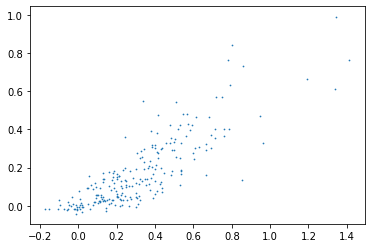

In [237]:
import matplotlib.pyplot as plt

plt.scatter(x=df_combined['Pol2'],  y=df_combined['Pom121'], s=0.5)

from scipy import stats
stats.spearmanr(df_combined['Pol2'],df_combined['Pom121'])

SpearmanrResult(correlation=0.8327373851571739, pvalue=1.9628151400532991e-59)

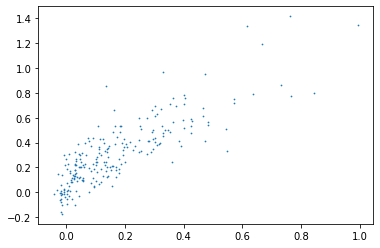

In [238]:
import matplotlib.pyplot as plt

plt.scatter(x=df_combined['Pom121'],  y=df_combined['Pol2'], s=0.5)

from scipy import stats
stats.spearmanr(df_combined['Pol2'],df_combined['Pom121'])